In [ ]:
using StaticArrays
# using Plots
using LinearAlgebra
# using Makie
using GLMakie 
using LsqFit
include("Elastic.jl")
using .Elastic
using FFMPEG
using DelimitedFiles
using Plots
using JLD2
using Statistics

In [2]:
# 定义铜的晶格常数（单位：Å）
lattice_constant = 1.54

# 定义铜的FCC晶胞的基矢量
lattice_vectors = collect((Matrix([
    lattice_constant 0.0 0.0; #a1
    0.0 lattice_constant 0.0; #a2
    0.0 0.0 lattice_constant] #a3
))')

# 定义铜的FCC晶胞中的原子位置（单位：Å）
atom_positions = [
    Vector([0.0, 0.0, 0.0]),
    Vector([0.0, 0.5, 0.5]),
    Vector([0.5, 0.0, 0.5]),
    Vector([0.5, 0.5, 0.0]),
    Vector([1.0, 0.0, 0.0]),
    Vector([0.0, 1.0, 0.0]),
    Vector([0.0, 0.0, 1.0]),
    Vector([0.5, 1.0, 0.5]),
    Vector([1.0, 0.5, 0.5]),
    Vector([0.5, 0.5, 1.0]),
    Vector([1.0, 0.0, 1.0]),
    Vector([1.0, 1.0, 0.0]),
    Vector([0.0, 1.0, 1.0]),
    Vector([1.0, 1.0, 1.0])
] 

# 创建铜的原子列表
atoms = [Atom(pos) for pos in atom_positions]

cell=UnitCell(lattice_vectors,atoms)
cpcell=copycell(cell,1,1,1)
fcell=filtercell(cpcell)
fig=visualize_unitcell_atoms(fcell)

In [3]:
#lj势能
function lj(r::Float64)
    return 4*(1/r^12-1/r^6)
end
function Flj(r::Vector{Float64})
    rn=norm(r)
    return 24*(2/rn^14-1/rn^8)*r
end

ct=5.0
interaction = Interaction(lj, Flj, ct, 0.1)

x=1:0.001:ct
y=interaction.cutenergy.(x)
lines(x,y)

In [16]:
using JLD2

# 打开文件并读取内容
file_path = "data_pthv3cell_444_Ts=1_p=100_ljdump10.txt"
datacell = JLD2.jldopen(file_path, "r") do file
    # 创建一个字典来存储所有数据
    Dict(name => read(file, name) for name in keys(file))
end




Dict{String, UnitCell} with 10000 entries:
  "cell_5190" => UnitCell([1.3893 0.0 0.0; 0.0 1.3893 0.0; 0.0 0.0 1.3893], Ato…
  "cell_3358" => UnitCell([1.38701 0.0 0.0; 0.0 1.38701 0.0; 0.0 0.0 1.38701], …
  "cell_4214" => UnitCell([1.3885 0.0 0.0; 0.0 1.3885 0.0; 0.0 0.0 1.3885], Ato…
  "cell_6150" => UnitCell([1.38853 0.0 0.0; 0.0 1.38853 0.0; 0.0 0.0 1.38853], …
  "cell_1204" => UnitCell([1.38761 0.0 0.0; 0.0 1.38761 0.0; 0.0 0.0 1.38761], …
  "cell_3664" => UnitCell([1.38952 0.0 0.0; 0.0 1.38952 0.0; 0.0 0.0 1.38952], …
  "cell_6491" => UnitCell([1.38857 0.0 0.0; 0.0 1.38857 0.0; 0.0 0.0 1.38857], …
  "cell_9873" => UnitCell([1.38826 0.0 0.0; 0.0 1.38826 0.0; 0.0 0.0 1.38826], …
  "cell_4459" => UnitCell([1.39053 0.0 0.0; 0.0 1.39053 0.0; 0.0 0.0 1.39053], …
  "cell_6989" => UnitCell([1.38782 0.0 0.0; 0.0 1.38782 0.0; 0.0 0.0 1.38782], …
  "cell_8721" => UnitCell([1.38962 0.0 0.0; 0.0 1.38962 0.0; 0.0 0.0 1.38962], …
  "cell_1226" => UnitCell([1.38872 0.0 0.0; 0.0 1.38872 0.0; 0.0 0

In [ ]:

visualize_unitcell_atoms0(datacell["cell_1.0"],iftext=true)

In [38]:
visualize_unitcell_atoms0(inicell,iftext=true)

In [58]:

i=1
# 读取文件中的所有数据
data = readdlm("data_pthv2.txt")
z=data[i,:];

In [59]:

# i=1
# # 读取文件中的所有数据
# data = readdlm("data_pthv1_z.txt")
# dim=Int(size(data)[2]/2)
# z=data[84,:]
# v=z[dim]
# T=z[dim-1]
# dv=z[dim*2]
# dT=z[dim*2-1]
# println("V=$v, T=$T, dV=$dv, dT=$dT")

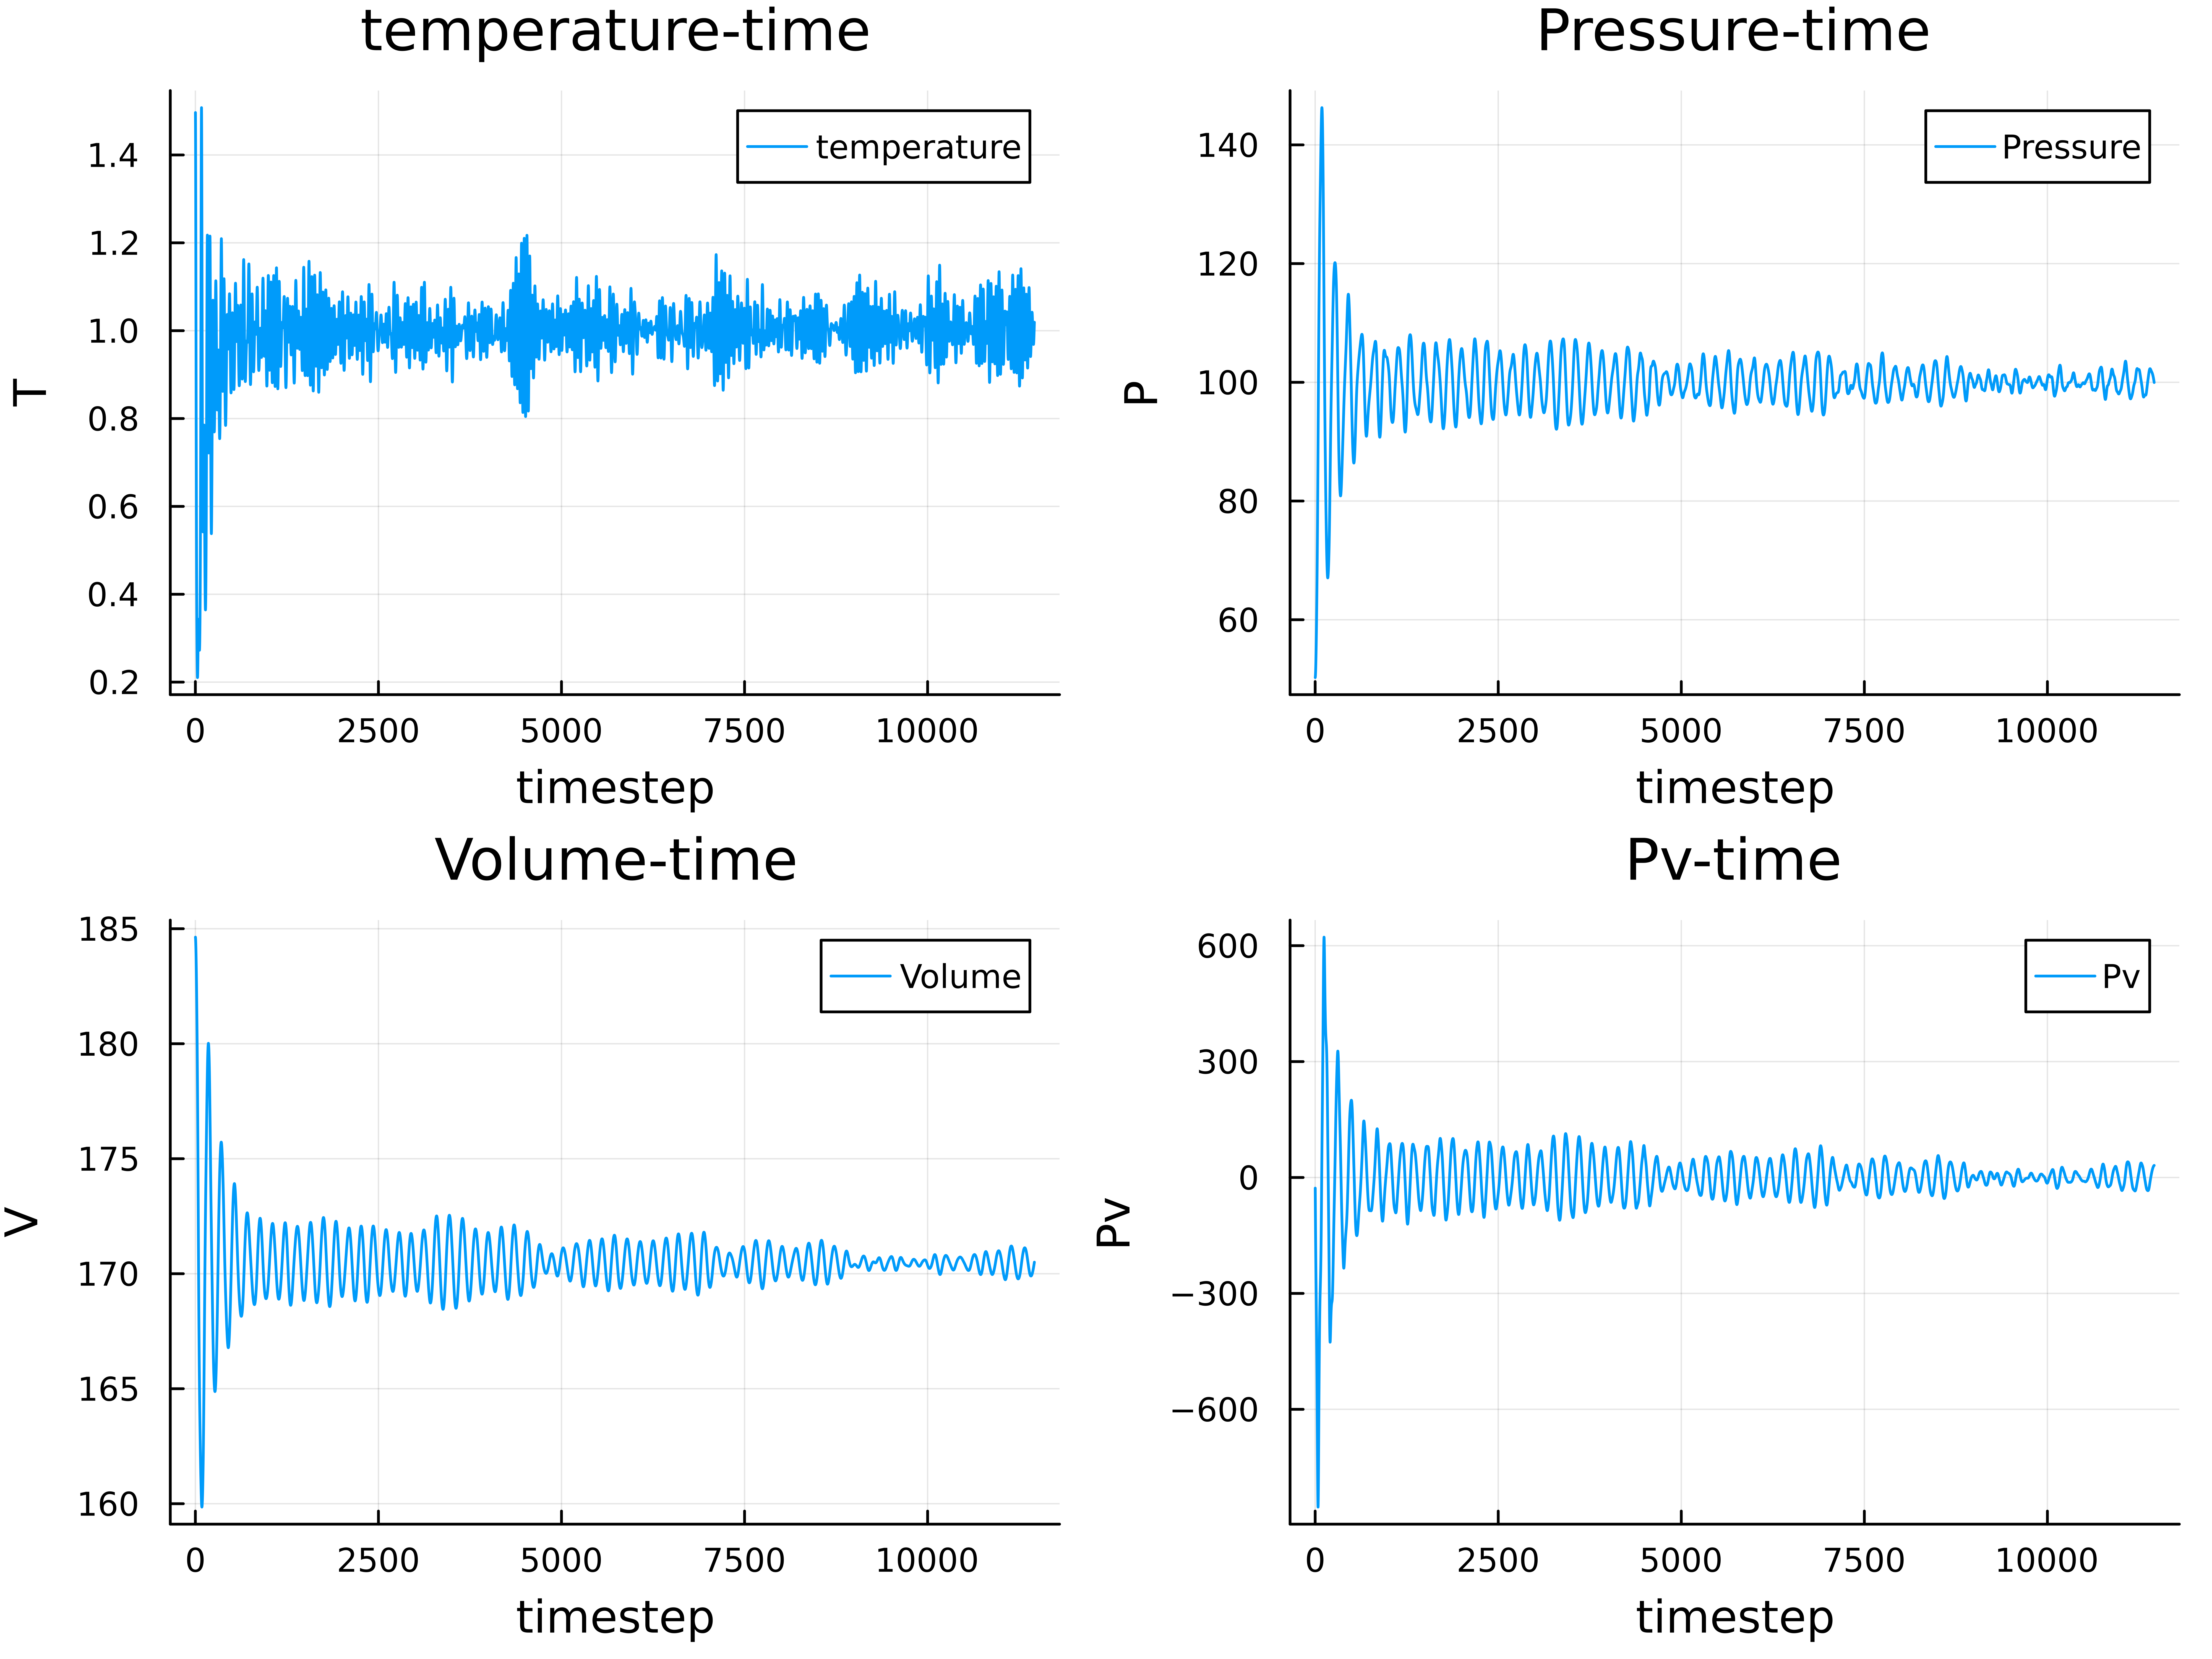

In [60]:
Plots.plot(
Plots.plot(data[:,1],data[:,2],label="temperature",xlabel="timestep",ylabel="T",title="temperature-time"),
Plots.plot(data[:,1],data[:,3],label="Pressure",xlabel="timestep",ylabel="P",title="Pressure-time"),
Plots.plot(data[:,1],data[:,4],label="Volume",xlabel="timestep",ylabel="V",title="Volume-time"),
Plots.plot(data[:,1],data[:,5],label="Pv",xlabel="timestep",ylabel="Pv",title="Pv-time"),
size=(800,600), dpi=1000
)


In [51]:
savefig("data_pthv2_444_Ts=1_p=100_ljdump1_Hz.png")

"c:\\Users\\ASUS\\Desktop\\计算物理模拟实验\\Elastic constant simulation\\data_pthv2_444_Ts=1_p=100_ljdump1_Hz.png"

In [55]:
maxt=length(data[:,1])
bg=Int(maxt/2)
println("<T>=",mean(data[bg:maxt,2]))
println("<P>=",mean(data[bg:maxt,3]))
println("<V>=",mean(data[bg:maxt,4]))
println("<Pv>=",mean(data[bg:maxt,5]))

println("std T=",std(data[bg:maxt,2]))
println("std P=",std(data[bg:maxt,3]))
println("std V=",std(data[bg:maxt,4]))
println("std Pv=",std(data[bg:maxt,5]))

<T>=1.0037017884336206
<P>=100.0146841096703
<V>=170.45977618624187
<Pv>=-0.2964424311422924
std T=0.04696030258404975
std P=2.0943308042168134
std V=0.5331969454779062
std Pv=29.07803885903106


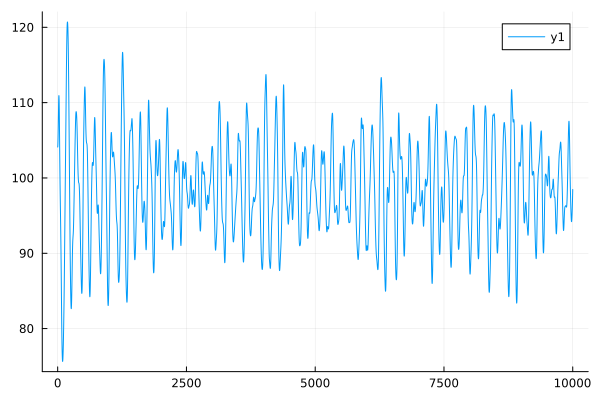

In [12]:
Plots.plot(data[:,1],data[:,3])

In [13]:
newcell=z2cell(z,fcell)
println(pressure_int(newcell,interaction))
println(cell_temp(newcell))
fig=visualize_unitcell_atoms0(newcell)
fig

InexactError: InexactError: Int64(-0.16666666666666666)

105.96865186858736

In [6]:
pl=[]
Tl=[]
il=1:10000
for i in il
    z=data[i,:];
    newcell=z2cell(z,fcell)
    p=pressure_int(newcell,interaction)
    T=cell_temp(newcell)
    push!(pl,p)
    push!(Tl,T)
end


In [8]:
fig=Figure(size=(1000,500))
ax1 = Axis(fig[1, 1], title = "P-time", xlabel = "time step", ylabel = "Y-Axis",
          )
ax2=Axis(fig[1, 2], title = "T-time", xlabel = "time step", ylabel = "Y-Axis",
)
lines!(ax1,il,pl)
ylims!(ax1, 0, 20)
lines!(ax2,il,Tl)
save("P,T-time.png", fig)    
fig


In [15]:
outputfold="outputfold_pthv3_222_T1_P100_sym"
function func(i)
    newcell=datacell["cell_$i"]
    fig=visualize_unitcell_atoms(newcell)
    return fig
end
isdir(outputfold) || mkpath(outputfold)
for i in 100:1:100*length(datacell)
    fig=func(i)
    save(joinpath(outputfold, "frame$i.png"), fig)
end


KeyError: KeyError: key "cell_10001" not found